# importing Needed packages

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as ms
from numpy.linalg import inv

# load dataset

In [68]:
df = pd.read_csv('data.csv')

# split_data

In [69]:
train_x, test_x, train_y, test_y = ms.train_test_split(df['x'], df['y'], train_size=0.7)


In [70]:
def normalize(x):
    x = (x - x.min() ) / (x.max() - x.min())
    return x

In [71]:
train_x=normalize(np.asanyarray(train_x))
test_x=normalize(np.asanyarray(test_x))
train_y=np.asanyarray(train_y)
test_y=np.asanyarray(test_y)

In [72]:
def addbias(X):
    matrix = X.reshape(X.shape[0], 1)
    ones = np.ones((matrix.shape[0],1))
    concat=np.concatenate((ones,matrix), axis=1)
    return concat 


In [73]:
x_trnbias = addbias(train_x)
x_tstbias = addbias(test_x)

In [74]:
def leastsquared(x,y):
    y=y.reshape(y.shape[0],1)
    thetaset = inv(x.T.dot(x)).dot(x.T).dot(y)
    return thetaset

In [89]:
def Mse(y,y_hat):
    diff=y-y_hat
    mse_pow=np.power(diff, 2,dtype='float64')
    mse = np.mean(mse_pow)
    return mse

In [85]:
def a(y,y_hat):
    diff=y-y_hat
    mse_pow=np.power(diff, 2,dtype='float64')
    mse = np.mean(mse_pow)
    return mse

In [76]:
leastSquared_theta = leastsquared(x_trnbias,train_y)


In [90]:
yHat_trn = leastSquared_theta[0] + leastSquared_theta[1] * train_x

yHat_tst = leastSquared_theta[0] + leastSquared_theta[1] * test_x

mseTrain = Mse(train_y,yHat_trn)
mseTest = Mse(test_y,yHat_tst)


In [91]:
print('theta0: ',leastSquared_theta[0])
print('theta1: ',leastSquared_theta[1])

theta0:  [79.75387007]
theta1:  [-49.62369159]


In [92]:
print('decision boundary formula:')
print( 'y ='+str(leastSquared_theta[0]) + ' + ' + str(leastSquared_theta[1]) + '*x1')

decision boundary formula:
y =[79.75387007] + [-49.62369159]*x1


In [94]:

print('MSE Train: ', mseTrain)
print('MSE Test: ', mseTest)


MSE Train:  17.019203409440927
MSE Test:  13.990372372323291


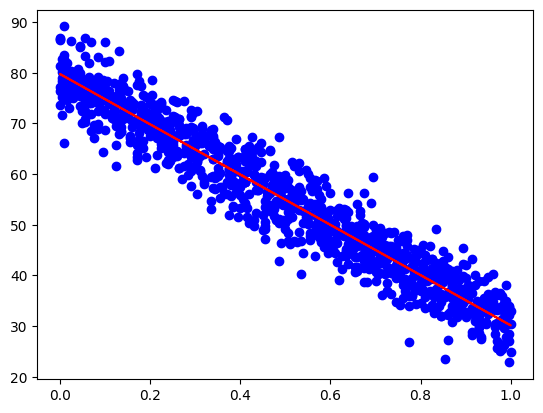

In [81]:
plt.scatter(train_x,train_y, color='blue')
plt.plot(train_x,yHat_trn, color='red')

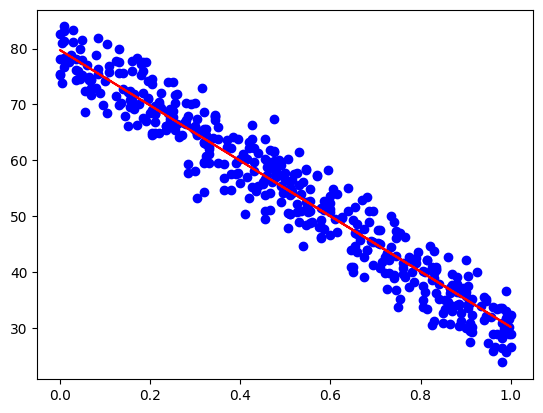

In [82]:
plt.scatter(test_x,test_y, color='blue')
plt.plot(test_x,yHat_tst, color='red')